# IMPORTING LIBRARIES 

In [1]:
from flask import Flask
import pandas as pd
import matplotlib.pyplot as plt
from flask import jsonify, request,Response
import pandas as pd
import seaborn as sns
import copy
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# READING THE DATA FROM CSV FILE

In [2]:
df = pd.read_csv("HR-DATA.csv")

# HEATMAP

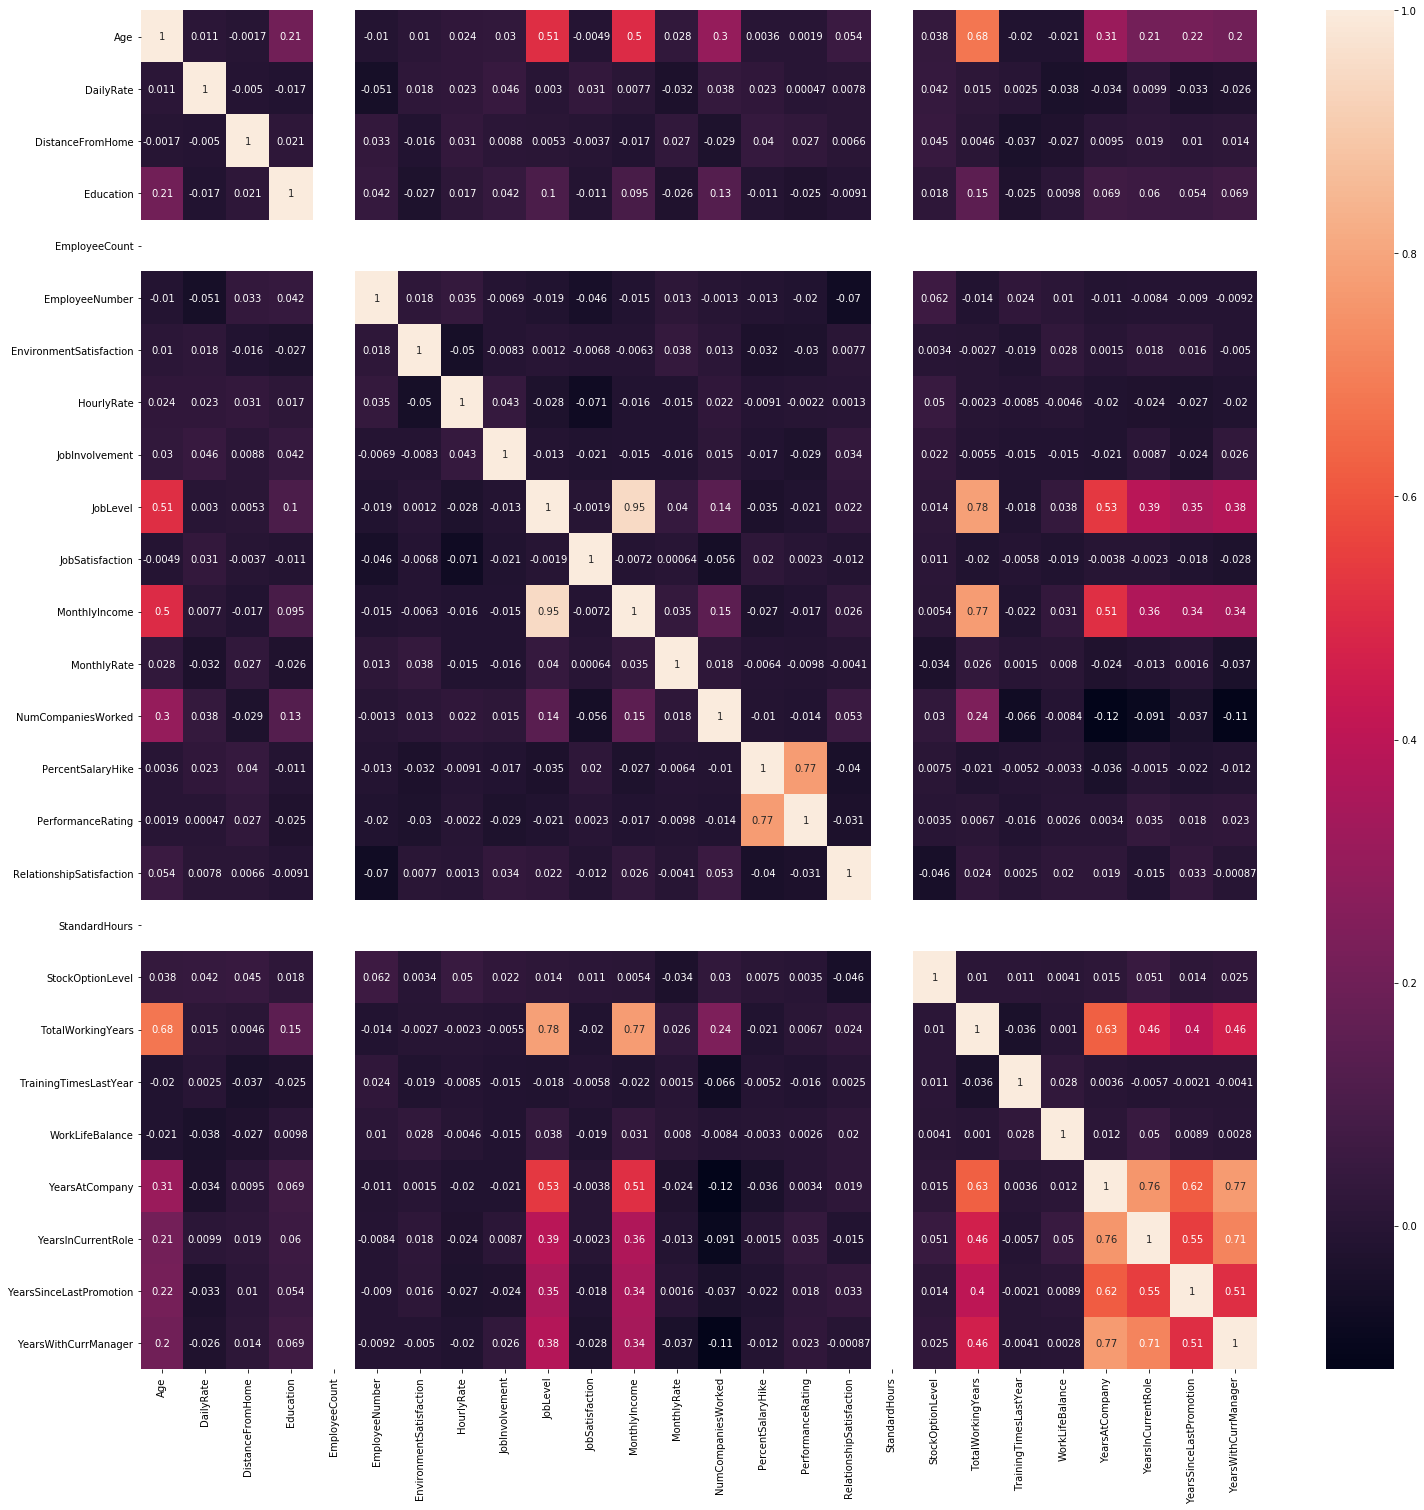

In [3]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

# COUNTPLOT

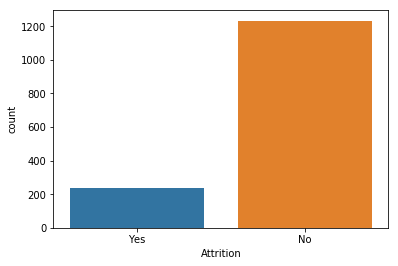

In [4]:
sns.countplot(df['Attrition'])

In [5]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
Y = pd.DataFrame({'Attrition':df['Attrition']})
X = copy.copy(df)

In [7]:
del X['Attrition']
string_cols = X[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']]
temp_data_frame = pd.get_dummies(string_cols)
del X['BusinessTravel']
del X['Department']
del X['EducationField']
del X['Gender']
del X['JobRole']
del X['MaritalStatus']
del X['Over18']
del X['OverTime']
X = pd.concat((temp_data_frame,X),axis = 1)


# MODEL TRAINING AND TESTING

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, shuffle=True)
logmod = LogisticRegression()
logmod.fit(X_train,y_train)
prediction = logmod.predict(X_test)
print("Accuracy Score - ",accuracy_score(prediction,y_test))
print(classification_report(prediction,y_test))
print("Confusion Matrix - \n",confusion_matrix(prediction,y_test))

D:\anaco\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaco\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score -  0.8741496598639455
              precision    recall  f1-score   support

          No       0.98      0.88      0.93       535
         Yes       0.40      0.79      0.53        53

    accuracy                           0.87       588
   macro avg       0.69      0.84      0.73       588
weighted avg       0.93      0.87      0.89       588

Confusion Matrix - 
 [[472  63]
 [ 11  42]]


# RESAMPLING OF DATA USING SMOTE

In [9]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, Y)

D:\anaco\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.3, shuffle=True)
logm = LogisticRegression()
logm.fit(X_train_res,y_train_res)
prediction1 = logm.predict(X_test_res)
print("Accuracy Score - ",accuracy_score(prediction1,y_test_res))
print(classification_report(prediction1,y_test_res))
print("Confusion Matrix - \n",confusion_matrix(prediction1,y_test_res))

Accuracy Score -  0.9337837837837838
              precision    recall  f1-score   support

          No       0.97      0.91      0.94       408
         Yes       0.90      0.96      0.93       332

    accuracy                           0.93       740
   macro avg       0.93      0.94      0.93       740
weighted avg       0.94      0.93      0.93       740

Confusion Matrix - 
 [[372  36]
 [ 13 319]]


D:\anaco\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


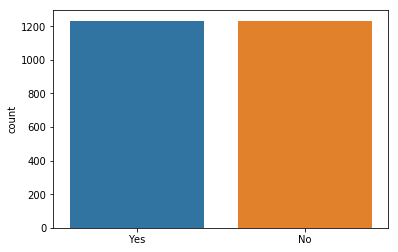

In [11]:
sns.countplot(y_res)

# USING KNN CLASSIFICATION METHOD

In [12]:
classifier = KNeighborsClassifier(n_neighbors=4)  
classifier.fit(X_train_res, y_train_res)  
prediction2 = classifier.predict(X_test_res) 
print("Accuracy Score - ",accuracy_score(prediction2,y_test_res))
print(classification_report(prediction2,y_test_res))
print("Confusion Matrix - \n",confusion_matrix(prediction2,y_test_res))

Accuracy Score -  0.7837837837837838
              precision    recall  f1-score   support

          No       0.71      0.85      0.77       323
         Yes       0.86      0.73      0.79       417

    accuracy                           0.78       740
   macro avg       0.79      0.79      0.78       740
weighted avg       0.80      0.78      0.78       740

Confusion Matrix - 
 [[274  49]
 [111 306]]


# USING FLASK API TO GET INPUT FROM USER

In [13]:
app=Flask(__name__)
pred =""
v = pd.DataFrame()
@app.route("/post",methods=['POST'])
def test():
    global df
    global Y
    global pred
    global v
    x = copy.copy(df)
    del x['Attrition']
    data = request.get_json()
    user_dataframe = pd.DataFrame([data])
    new_x = pd.concat([x,user_dataframe],axis=0,ignore_index=True)
    cols = new_x[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']]
    temp_data_frame = pd.get_dummies(cols)
    del new_x['BusinessTravel']
    del new_x['Department']
    del new_x['EducationField']
    del new_x['Gender']
    del new_x['JobRole']
    del new_x['MaritalStatus']
    del new_x['Over18']
    del new_x['OverTime']
    v = pd.concat([temp_data_frame,new_x],axis = 1)
    a,b = v.shape
    test = v[a-1:]
    pred=logmod.predict(test)
    return jsonify(data)

@app.route("/get",methods=["GET"]) 
def display():
    global v
    a,b = v.shape
    test = v[a-1:]
    print("Probability:",logmod.predict_proba(test))
    return jsonify(pred.tolist())
    

if __name__ == "__main__":
    app.run()
    

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
